**Table of contents**<a id='toc0_'></a>    
- [이진 분류 모델의 평가](#toc1_)    
- [분류 모델의 평가 항목](#toc2_)    
- [실습](#toc3_)    
  - [각 수치 구해보기](#toc3_1_)    
  - [ROC 커브 그리기](#toc3_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

- 모델을 좋다, 그저 그렇다, 나쁘다 등으로 평가할 방법은 없음
- 대부분 다양한 모델, 다양한 파라미터를 두고 `상대적`으로 비교

- 회귀모델의 평가는 간단한 편
    - 실제 값과의 에러치를 가지고 계산하면 되니까

# <a id='toc1_'></a>[이진 분류 모델의 평가](#toc0_)

|항목||
|--|--|
|TP True Positive|실제 Positive를 Positive라고 맞춘 경우|
|FN False Negative|실제 Positive를 Negative라고 틀리게 예측한 경우|
|TN True Negative|실제 Negative를 Negative라고 맞춘 경우|
|FP False Positive|실제 Negative를 Positive라고 틀리게 예측한 경우|

# <a id='toc2_'></a>[분류 모델의 평가 항목](#toc0_)

|항목|||
|--|--|--|
|정확도|Accuracy = $\frac{TP + TN}{TP + TN + FP + FN}$ | 전체 데이터 중 맞게 예측한 것의 비율|
|오차행렬|Confusion Matrix|
|정밀도|Precision = $\frac{TP}{TP + FP}$|Positive라고 예측한 것 중 실제 Positive의 비율|
|재현율|Recall(TPR, True Positive Rate) = $\frac{TP}{TP + FN}$|Positive 데이터 중에서 Positive라고 예측한 비율|
|위양성률|Fall-out(FPR, False Positive Rate) = $\frac{FP}{FP + TN}$|Negative 데이터 중에서 Positive라고 잘못 예측한 비율|
|F1 score|$\frac{2*precision*recall}{precision + recall}$|Recall과 Precision이 어느 한쪽으로 치우치지 않고 둘 다 높은 값을 가질수록 높은 값을 가짐|
|ROC Curve|FPR이 변할 때, TPR의 변화를 그린 그래프, 다양한 threshold에 대한 이진분류기의 성능을 한 번에 표시한 것|직선에 가까울수록 머신러닝 모델의 성능이 떨어지는 것으로 판단|
|AUC|ROC Curve 아래의 넓이|기울기가 1인 직선 아래의 면적이 0.5이므로 AUC는 0.5보다 커야함(일반적으로 1에 가까울수록 좋은 수치)|

- 분류 모델은 그 결과를 속할 비율(확률)로 반환함
    - 지금까지는 그 비율에서 `threshold`를 0.5라 하고 0, 1의 결과를 얻었다. 

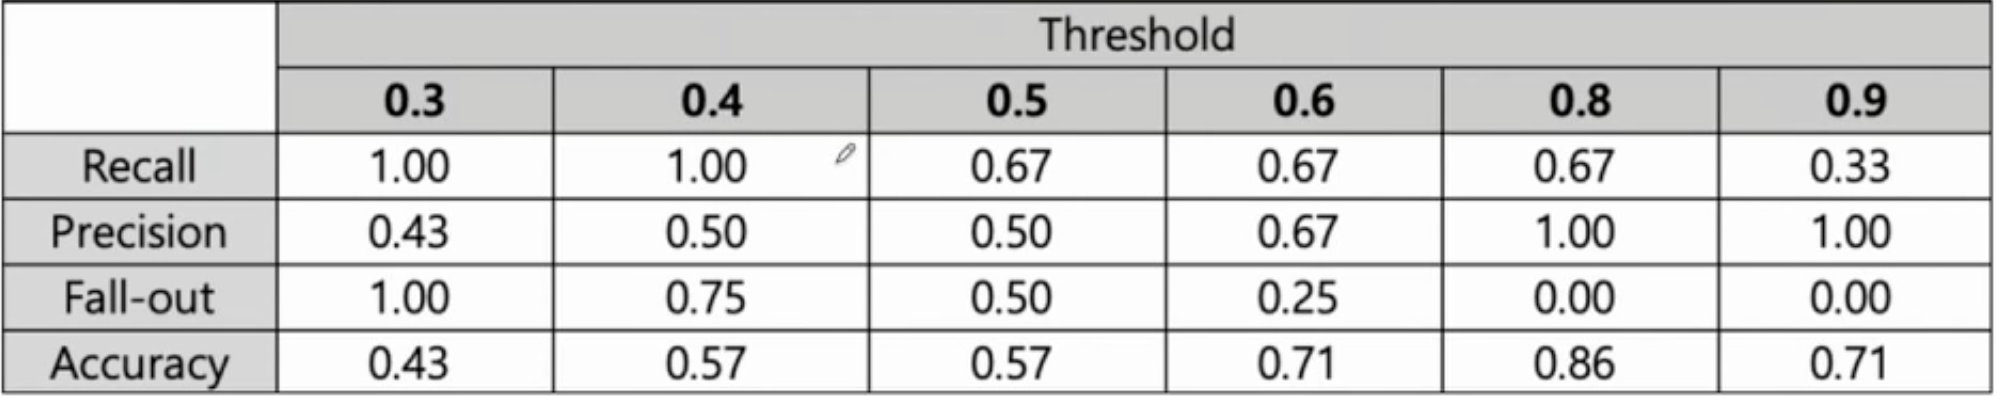

위의 데이터와 같은 결과라면 <br>
- 실제 양성인 데이터를 음성이라고 판단하면 안되는 경우(ex. 암환자 판별) 
    - Recall이 중요. Threshold를 0.3 혹은 0.4로 설정해야 함
- 실제 음성인 데이터를 양성이라고 판단하면 안되는 경우(ex. 스팸메일)
    - Precision이 중요. Threshold를 0.8 혹은 0.9가 적합할 수 있음

# <a id='toc3_'></a>[실습](#toc0_)

In [14]:
from IPython.display import Image

In [1]:
import pandas as pd

In [3]:
red_url = 'https://raw.githubusercontent.com/PinkWink/forML_study_data/refs/heads/main/data/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/forML_study_data/refs/heads/main/data/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')

red_wine['color'] = 1
white_wine['color'] = 0

wine = pd.concat([red_wine, white_wine])
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

In [5]:
X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=13)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train Acc: ', accuracy_score(y_train, y_pred_tr))
print('Test Acc: ', accuracy_score(y_test, y_pred_test))

Train Acc:  0.7371560515682124
Test Acc:  0.7276923076923076


## <a id='toc3_1_'></a>[각 수치 구해보기](#toc0_)

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

print('Accuracy: ', accuracy_score(y_test, y_pred_test))
print('Recall: ', recall_score(y_test, y_pred_test))
print('Precision: ', precision_score(y_test, y_pred_test))
print('AUC Score: ', roc_auc_score(y_test, y_pred_test))
print('F1 Score: ', f1_score(y_test, y_pred_test))

Accuracy:  0.7276923076923076
Recall:  0.7849331713244229
Precision:  0.7849331713244229
AUC Score:  0.706931994467243
F1 Score:  0.7849331713244229


## <a id='toc3_2_'></a>[ROC 커브 그리기](#toc0_)

In [12]:
wine_tree.predict_proba(X_test)

array([[0.06557377, 0.93442623],
       [0.63850486, 0.36149514],
       [0.63850486, 0.36149514],
       ...,
       [0.27900147, 0.72099853],
       [0.63850486, 0.36149514],
       [0.27900147, 0.72099853]])

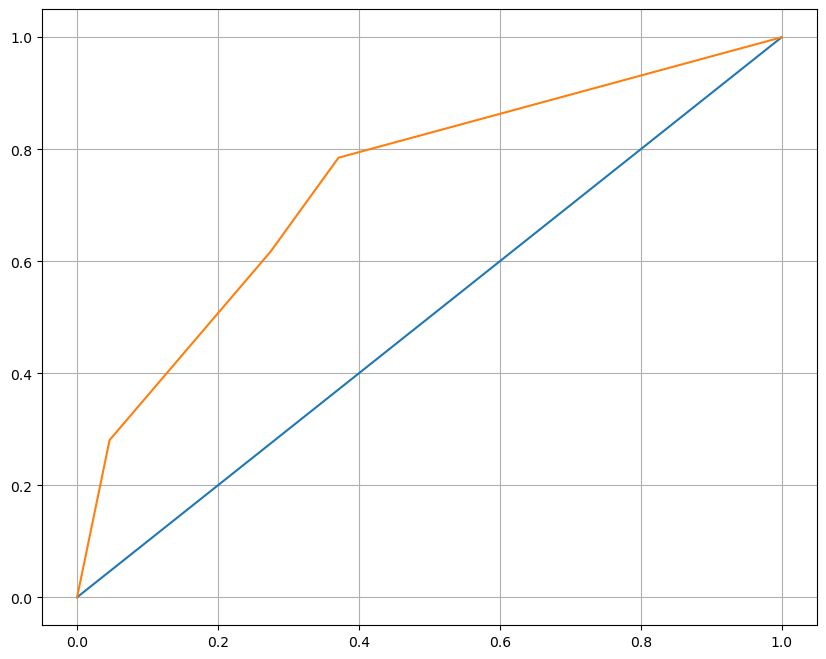

In [13]:
import matplotlib.pyplot as plt

pred_proba = wine_tree.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, pred_proba)

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1])
plt.plot(fpr, tpr)
plt.grid()
plt.show()